In [1]:
'''import packages'''

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import skimage
from retinaface import RetinaFace
import matplotlib.image as mpimg
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import csv
import pandas as pd
import mediapipe as mp

In [14]:
'''Import faces'''

faces = []
for folder in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test'):
    print(folder)
    i = 0
    for face in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test\\'+folder):
        i +=1
        image = cv2.imread(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test' + "\\" + folder + "\\" + face)
        im = skimage.color.rgb2gray(image)
        img = cv2.resize(im,(380,380))
        faces.append(img)
    print(str(i)+" Faces")
print("Done processing...")


Facialispares 0 - Andrei - 1
289 Faces
Facialispares 0 - Elsa - 1
323 Faces
Facialispares 0 - Nathalie - 1
230 Faces
Facialispares 0 - Oskar - 1
334 Faces
Facialispares 0 - Viktor - 1
256 Faces
Facialispares 1 - Andrei - 1
150 Faces
Facialispares 1 - Andrei - 2
130 Faces
Facialispares 1 - Nathalie - 1
89 Faces
Facialispares 1 - Nathalie - 2
110 Faces
Facialispares 1 - Oskar - 1
112 Faces
Facialispares 1 - Oskar - 2
146 Faces
Facialispares 1 - Viktor - 1
113 Faces
Facialispares 1 - Viktor - 2
119 Faces
Facialispares 3 - Andrei - 1
131 Faces
Facialispares 3 - Andrei - 2
172 Faces
Facialispares 3 - Nathalie - 1
58 Faces
Facialispares 3 - Nathalie - 2
91 Faces
Facialispares 3 - Oskar - 2
126 Faces
Facialispares 3 - Oskar - 3
100 Faces
Facialispares 3 - Viktor - 1
110 Faces
Facialispares 3 - Viktor - 2
119 Faces
Done processing...


In [24]:
"hog for feature extraction"
hog_faces = []
from skimage.feature import hog
for folder in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test'):
    print(folder)
    i = 0
    for face in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test\\'+folder):
        i +=1
        image = cv2.imread(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\test' + "\\" + folder + "\\" + face)
        img = cv2.resize(image,(380,380))
        
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block = (2, 2), visualize=True, multichannel=True)
        hog_faces.append(hog_image)
        
    print(str(i)+" Faces")
print("Done processing...")

Facialispares 0 - Andrei - 1
289 Faces
Facialispares 0 - Elsa - 1
323 Faces
Facialispares 0 - Nathalie - 1
230 Faces
Facialispares 0 - Oskar - 1
334 Faces
Facialispares 0 - Viktor - 1
256 Faces
Facialispares 1 - Andrei - 1
150 Faces
Facialispares 1 - Andrei - 2
130 Faces
Facialispares 1 - Nathalie - 1
89 Faces
Facialispares 1 - Nathalie - 2
110 Faces
Facialispares 1 - Oskar - 1
112 Faces
Facialispares 1 - Oskar - 2
146 Faces
Facialispares 1 - Viktor - 1
113 Faces
Facialispares 1 - Viktor - 2
119 Faces
Facialispares 3 - Andrei - 1
131 Faces
Facialispares 3 - Andrei - 2
172 Faces
Facialispares 3 - Nathalie - 1
58 Faces
Facialispares 3 - Nathalie - 2
91 Faces
Facialispares 3 - Oskar - 2
126 Faces
Facialispares 3 - Oskar - 3
100 Faces
Facialispares 3 - Viktor - 1
110 Faces
Facialispares 3 - Viktor - 2
119 Faces
Done processing...


In [36]:
'''create a dataframe'''
face_data = []
target = []

#import labels for faces
for file in os.listdir(r"C:\Users\oskar\Documents\repo\stroke-video-analysis\testlabel"):
    print(file)
    file = open(r"C:\Users\oskar\Documents\repo\stroke-video-analysis\testlabel\\" + file,"r")
    t = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
   
    target += t[0]
    file.close()

print("targets" + str(len(target)))
print("faces" + str(len(faces)))


for face in faces:
    f = face.ravel()
    face_data.append(f)
    
print(len(face_data))

df = { 'faces': faces,
      'target':target,
      'data': face_data 
}

df = pd.DataFrame(df) 
print(str(len(faces)) + " Faces in dataframe")
print(str(len(face_data[0])) + " Features in a face")


Facialispares 0 - Andrei - 1 label.csv
Facialispares 0 - Elsa - 1 label.csv
Facialispares 0 - Nathalie - 1 label.csv
Facialispares 0 - Oskar - 1 label.csv
Facialispares 0 - Viktor - 1 label.csv
Facialispares 1 - Andrei - 1 label.csv
Facialispares 1 - Andrei - 2 label.csv
Facialispares 1 - Nathalie - 1 label.csv
Facialispares 1 - Nathalie - 2 label.csv
Facialispares 1 - Oskar - 1 label.csv
Facialispares 1 - Oskar - 2 label.csv
Facialispares 1 - Viktor - 1 label.csv
Facialispares 1 - Viktor - 2 label.csv
Facialispares 3 - Andrei - 1 label.csv
Facialispares 3 - Andrei - 2 label.csv
Facialispares 3 - Nathalie - 1 label.csv
Facialispares 3 - Nathalie - 2 label.csv
Facialispares 3 - oskar - 2 label.csv
Facialispares 3 - oskar - 3 label.csv
Facialispares 3 - Viktor - 1 label.csv
Facialispares 3 - Viktor - 2 label.csv
targets3308
faces3308
3308
3308 Faces in dataframe
144400 Features in a face


In [37]:

"create a training and test set"

h,w = df.faces[0].shape
n_samples, n_labels = df.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = df.data.values.tolist()
y = df.target
n_features = len(X[1])
labels =["No stroke","Stroke"]
n_classes = len(labels)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X[:2000], y[:2000], test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data [0.13967774 0.14816719 0.16744775 ... 0.06008973 0.12795453 0.18063889]
image [[0.13967774 0.14816719 0.16744775 ... 0.1593015  0.14173951 0.15663851]
 [0.14000227 0.1520389  0.1631786  ... 0.15985878 0.15017481 0.17288481]
 [0.14779347 0.1591889  0.16472143 ... 0.17449588 0.176007   0.19470255]
 ...
 [0.39877526 0.39900471 0.39900471 ... 0.08016349 0.07261549 0.08348684]
 [0.39522246 0.39522246 0.39522246 ... 0.06880849 0.09796324 0.13307844]
 [0.39116212 0.38747055 0.39120801 ... 0.06008973 0.12795453 0.18063889]]
(3308,)
Total dataset size:
n_samples: 3308
n_features: 144400
n_classes: 1


In [ ]:
"Hog transformation for training and test set"


In [39]:
"Eigenface transformation for training and test set"
n_components = 8

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


eigenfaces = pca.components_.reshape((n_components, h, w))


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Extracting the top 8 eigenfaces from 1500 faces


In [40]:
"NN model for classification"
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

8


In [42]:
"Fit model to data"

model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train_pca, y_train, epochs = 20, validation_data = (X_test_pca,y_test))

Epoch 1/20
47/47 [==============================] - 11s 71ms/step - loss: 0.4151 - accuracy: 0.8000 - val_loss: 0.2370 - val_accuracy: 0.9180
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1973 - accuracy: 0.9320 - val_loss: 0.1711 - val_accuracy: 0.9380
Epoch 3/20
47/47 [==============================] - 0s 11ms/step - loss: 0.1591 - accuracy: 0.9360 - val_loss: 0.1526 - val_accuracy: 0.9440
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9387 - val_loss: 0.1447 - val_accuracy: 0.9560
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9447 - val_loss: 0.1379 - val_accuracy: 0.9540
Epoch 6/20
47/47 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9460 - val_loss: 0.1374 - val_accuracy: 0.9540
Epoch 7/20
47/47 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9440 - val_loss: 0.1337 - val_accuracy: 0.9540
Epoch 8/20
47/47 

In [ ]:
score = model.evaluate(X_test_pca, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [43]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

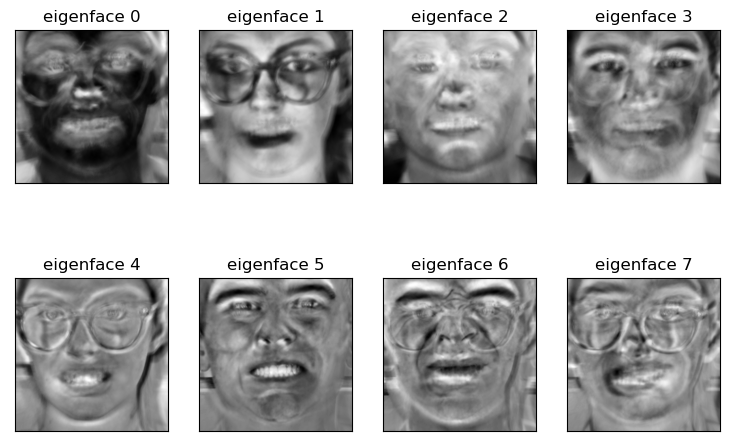

In [44]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[1])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

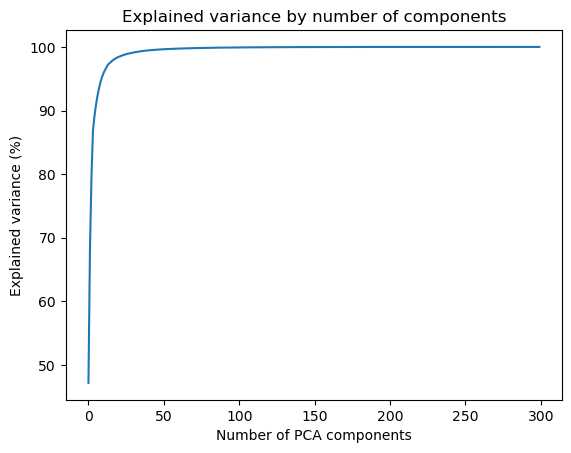

In [ ]:
'''check numb of componants for good variance'''
pca = PCA(n_components=300).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 
